# STAT3612 Lecture 5 - Regularized Linear Models

[Dr. Aijun Zhang](http://www.statsoft.org) - [STAT3612 Statistical Machine Learning](https://ajzhanghku.github.io/Stat3612/)

29 September 2020

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
# add some new features
df['SW2'] = df['sepal width (cm)']**2
df['PL2'] = df['petal length (cm)']**2
df['PW2'] = df['petal width (cm)']**2
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),SW2,PL2,PW2
0,5.1,3.5,1.4,0.2,12.25,1.96,0.04
1,4.9,3.0,1.4,0.2,9.00,1.96,0.04
2,4.7,3.2,1.3,0.2,10.24,1.69,0.04
3,4.6,3.1,1.5,0.2,9.61,2.25,0.04
4,5.0,3.6,1.4,0.2,12.96,1.96,0.04


## Ridge Regression

In [4]:
y = df['sepal length (cm)'].values
X = df.iloc[:,1:].values

# center the data before the shrinkage regression
y = y - y.mean()
X = X - X.mean(axis=0)

In [5]:
from sklearn import linear_model

n_alphas = 200
alphas = np.linspace(0,10,n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a,fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
coefs = np.array(coefs)

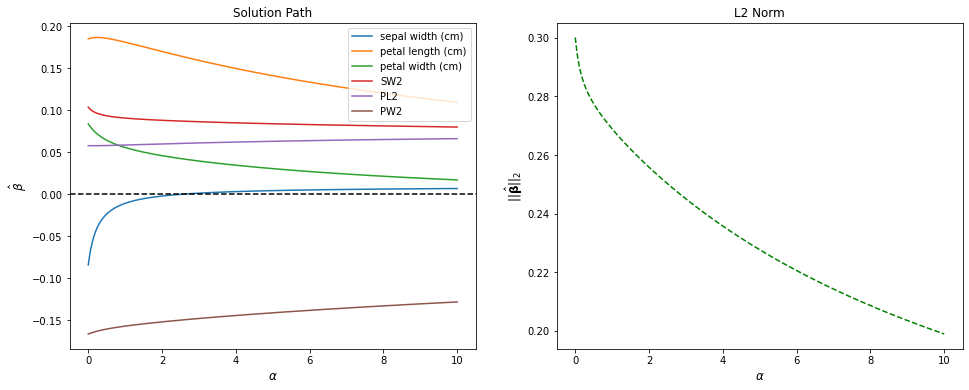

In [6]:
fig,axes = plt.subplots(1,2,figsize=(16,6))

plt.subplot(axes[0])
labels = df.columns[1:].values
for i in range(coefs.shape[1]):
    plt.plot(alphas,coefs[:,i],label=labels[i])
plt.axhline(y=0,xmin=0,xmax=10,color='black',linestyle='--')
plt.xlabel(r'$\alpha$',fontsize=12)
plt.ylabel(r'$\hat{\beta}$',fontsize=12)
plt.title('Solution Path',fontsize=12)
plt.axis('tight')
plt.legend()

plt.subplot(axes[1])
l2norm = np.linalg.norm(coefs,ord=2,axis=1)
plt.plot(alphas,l2norm,'--g')
plt.xlabel(r'$\alpha$',fontsize=12)
plt.ylabel(r'$||\hat{\mathbf{\beta}}||_2$',fontsize=12)
plt.title('L2 Norm',fontsize=12)
plt.show()

## LASSO

In [7]:
n_alphas = 200
alphas = np.logspace(-10,0,n_alphas)
alphas_lasso, coefs, _ = linear_model.lasso_path(X, y, alphas=alphas)
log_alphas_lasso = np.log10(alphas_lasso)

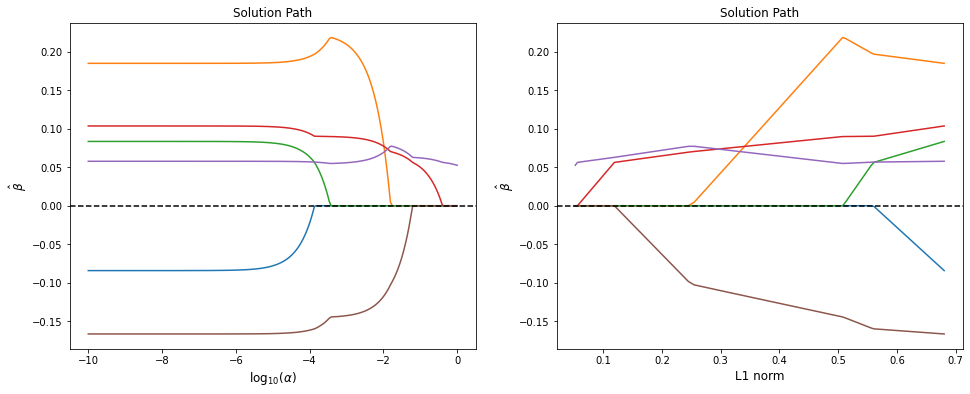

In [8]:
fig,axes = plt.subplots(1,2,figsize=(16,6))

plt.subplot(axes[0])
plt.plot(log_alphas_lasso,coefs.T)
plt.axhline(y=0,xmin=0,xmax=10,color='black',linestyle='--')
plt.xlabel(r'$\log_{10}(\alpha)$',fontsize=12)
plt.ylabel(r'$\hat{\beta}$',fontsize=12)
plt.title('Solution Path',fontsize=12)
plt.axis('tight')

plt.subplot(axes[1])
xx = np.sum(np.abs(coefs.T), axis=1)
plt.plot(xx,coefs.T)
plt.axhline(y=0,xmin=0,xmax=1,color='black',linestyle='--')
plt.xlabel(r'L1 norm',fontsize=12)
plt.ylabel(r'$\hat{\beta}$',fontsize=12)
plt.title('Solution Path',fontsize=12)
plt.axis('tight')

plt.show()

## Elastic Net

In [9]:
n_alphas = 200
l1_ratio = 0.1
alphas = np.logspace(-10,0,n_alphas)
alphas_enet, coefs, _ = linear_model.enet_path(X, y, l1_ratio=l1_ratio, alphas=alphas)
log_alphas_enet = np.log10(alphas_enet)

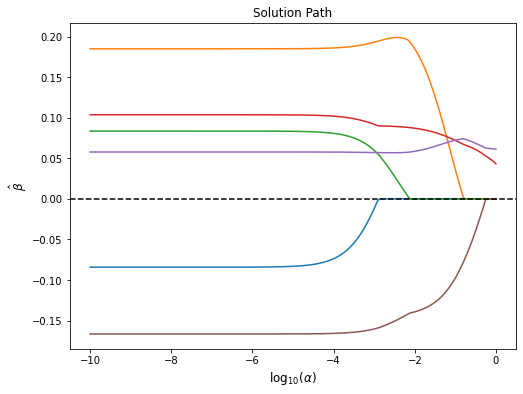

In [10]:
plt.figure(figsize=(8,6))
plt.plot(log_alphas_enet,coefs.T)
plt.axhline(y=0,xmin=0,xmax=10,color='black',linestyle='--')
plt.xlabel(r'$\log_{10}(\alpha)$',fontsize=12)
plt.ylabel(r'$\hat{\beta}$',fontsize=12)
plt.title('Solution Path',fontsize=12)
plt.axis('tight')
plt.show()

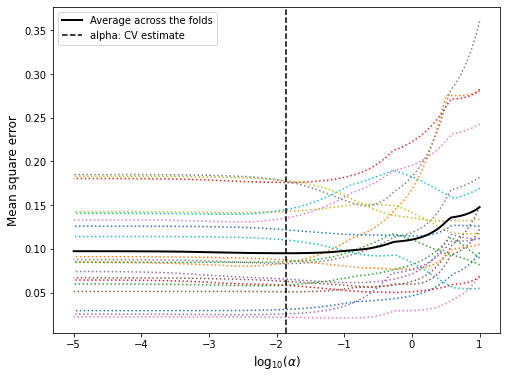

In [11]:
alphas = np.logspace(-5,1,n_alphas)
model = linear_model.ElasticNetCV(cv=20,l1_ratio=l1_ratio,alphas=alphas,
                                  fit_intercept=False,random_state=0)
model.fit(X,y)
log_alphas = np.log10(model.alphas_)

plt.figure(figsize=(8,6))
plt.plot(log_alphas, model.mse_path_, ':')
plt.plot(log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')
plt.xlabel(r'$\log_{10}(\alpha)$',fontsize=12)
plt.ylabel('Mean square error',fontsize=12)
plt.axis('tight')
plt.legend()
plt.show()